# Bioinformatics part - Task

# Biological data procession  



## <font color='red'>0.What we want</font>

- **Download the data from ensembl database**

https://ftp.ensembl.org/pub/release-108/fasta/

- **data must be fasta in directory cds**

- **Organisms**

|Organism group|organism|
|---|---|
|Mammalia|Pongo_abelii|
|Mammalia|Sarcophilus_harrisii|
|Mammalia|Ornithorthynchus_anatinus|
|Mammalia|Ursus_maritimus|
|Mammalia|Rattus_norvegicus|
|Aves|Apteryx_haastii|
|Aves|Parus_major|
|Aves|Otus_sunia|
|Aves|Anas_platyrhynchos|
|Aves|Numida_meleagris|
|Molusca|Octupus_bimaculoides|
|Molusca|Lottia_gigantea|
|Molusca|Haliotis_rubra|
|Molusca|Crassostrea_gigas|
|Molusca|Mizuhopecten_yessoensis|
|Osteichthyes|Anabas_testudineous|
|Osteichthyes|Cyprinus_carpio_carpio|
|Osteichthyes|Cottoperca_gobio|
|Osteichthyes|Esox_lucius|
|Osteichthyes|Denticeps_clupeoides|
|Crustacea|Penaeus_monodon|
|Crustacea|Daphnia_magna|
|Crustacea|Pollicipes_pollicipes|
|Crustacea|Hyalella_azteca|
|Crustacea|Lepeophtheirus_salmonis|

- **Read and parse all fasta files**

Hint: from Bio use SeqIO.parse


- **Make csv files for each organism with the following columns**


In [2]:
pip install umap-learn

                                              0.0/85.7 kB ? eta -:--:--
     --------------------------------------   81.9/85.7 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 85.7/85.7 kB 1.2 MB/s eta 0:00:00
                                              0.0/56.8 kB ? eta -:--:--
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
#import gc_fraction as gf
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap


In [34]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("cleaned_data.csv")
df.drop(['cds ID'], axis=1, inplace=True)
df.drop(['species'], axis=1, inplace=True)
grouped = df.groupby('group')
n_init=10
groups=[]
print(type(grouped))
group_categories={}
group_categories_test={}
for category, group_df in grouped:
    print(f"DataFrame for Category {category}:")
    groups.append(category)
    group_df.drop(['group'], axis=1, inplace=True)
    X_train, X_test = train_test_split(group_df, test_size=0.05, random_state=42)
    group_categories[category]=X_train
    group_categories_test[category]=X_test
    print(type(group_df))
    #print(group_df)
    #print("\n")
print(group_categories.keys())


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
DataFrame for Category bird:
<class 'pandas.core.frame.DataFrame'>
DataFrame for Category crustacea:
<class 'pandas.core.frame.DataFrame'>
DataFrame for Category fish:
<class 'pandas.core.frame.DataFrame'>
DataFrame for Category mammal:
<class 'pandas.core.frame.DataFrame'>
DataFrame for Category mollusca:
<class 'pandas.core.frame.DataFrame'>
dict_keys(['bird', 'crustacea', 'fish', 'mammal', 'mollusca'])


In [58]:
def applyKmeansScore(*features):
    scaledValues=featurescalingTrain(*features)
    scaledValues_test=featurescalingtest(*features)
    sillhouettescoredict={}
    predict={}

    pcadict=apply_pca(scaledValues)
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_centroid={}
    kmeans_label={}
    for key in scaledValues:
      labels = kmeans.fit(scaledValues[key])
      centroids = kmeans.cluster_centers_
      kmeans_centroid[key]=centroids
      kmeans_label[key]=labels
      predict[key]=kmeans.predict(scaledValues_test[key])
      sillhouettescoredict[key]=silhouette_score(scaledValues_test[key],predict[key])

    return kmeans_centroid,kmeans_label,scaledValues,sillhouettescoredict

In [59]:
def applyKmeansScoreGcGc2(*features):
    scaledValues=featurescalingTrainGcGc2(*features)
    scaledValues_test=featurescalingTestGcGc2(*features)
    sillhouettescoredict={}
    predict={}

    pcadict=apply_pca(scaledValues)
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_centroid={}
    kmeans_label={}
    for key in scaledValues:
      labels = kmeans.fit(scaledValues[key])
      centroids = kmeans.cluster_centers_
      kmeans_centroid[key]=centroids
      kmeans_label[key]=labels
      predict[key]=kmeans.predict(scaledValues_test[key])
      sillhouettescoredict[key]=silhouette_score(scaledValues_test[key],predict[key])

    return kmeans_centroid,kmeans_label,scaledValues,sillhouettescoredict

In [54]:
def featurescalingtest(*features):
    scaledfeatures={}
    scaler = MinMaxScaler()
    for key in group_categories_test:
      scaledfeatures[key]=scaler.fit_transform(group_categories_test[key][list(features)])
    return scaledfeatures

In [55]:
def featurescalingTrain(*features):
    scaledfeatures={}
    scaler = MinMaxScaler()
    for key in group_categories:
      scaledfeatures[key]=scaler.fit_transform(group_categories[key][list(features)])
    return scaledfeatures

In [56]:
def featurescalingTrainGcGc2(*features):
    for key in group_categories:
      group_categories[key]['gc']=group_categories[key]['gc']+group_categories[key]['gc2']/2
    scaledfeatures={}
    scaler = MinMaxScaler()
    for key in group_categories:
      scaledfeatures[key]=scaler.fit_transform(group_categories[key][list(features)])
    return scaledfeatures

In [57]:
def featurescalingTestGcGc2(*features):
    for key in group_categories_test:
      group_categories_test[key]['GC']=group_categories_test[key]['gc']+group_categories_test[key]['gc2']/2
    scaledfeatures={}
    scaler = MinMaxScaler()
    for key in group_categories_test:
      scaledfeatures[key]=scaler.fit_transform(group_categories_test[key][list(features)])
    return scaledfeatures

In [60]:
def applyKmeans(*features):
    scaledValues=featurescalingTrain(*features)

    pcadict=apply_pca(scaledValues)
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_centroid={}
    kmeans_label={}
    for key in scaledValues:
      labels = kmeans.fit_predict(scaledValues[key])
      centroids = kmeans.cluster_centers_
      kmeans_centroid[key]=centroids
      kmeans_label[key]=labels

    return kmeans_centroid,kmeans_label,scaledValues

In [42]:
def apply_pca(scaledValues):
  l=list(scaledValues.keys())
  pcadict={}
  pca = PCA(n_components=2)
  for key in l:
    pcadict[key]=pca.fit_transform(scaledValues[key])
  return pcadict

In [61]:
def applyKmeansGcGc2(*features):
    scaledValues=featurescalingTrainGcGc2(*features)
    pcadict=apply_pca(scaledValues)
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_centroid={}
    kmeans_label={}
    for key in scaledValues:
      labels = kmeans.fit_predict(scaledValues[key])
      centroids = kmeans.cluster_centers_
      kmeans_centroid[key]=centroids
      kmeans_label[key]=labels

    return kmeans_centroid,kmeans_label,scaledValues

In [44]:
def plot_clusters(kmeans_centroid, kmeans_label,scaled_values,fe):
    for key in kmeans_centroid:
      #plt.scatter(X[:, features[0]], X[:, features[1]], c=kmeans.labels_, edgecolors='k', cmap='viridis', alpha=0.5, label=f'Model {i + 1} Data')
      plt.scatter(kmeans_centroid[key][:, 0], kmeans_centroid[key][:, 1], marker='o', s=100, linewidths=3, label=f'{key}')
    plt.title('Clustering')
    plt.xlabel(fe[0])
    plt.ylabel(fe[1])
    plt.legend()
    plt.show()




In [62]:
kmeans_centroid,kmeans_label,scaled_values, sillhouettescore=applyKmeansScore('gc3', 'enc')
print(sillhouettescore)

C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\

{'bird': 0.40608819985730576, 'crustacea': 0.3900206922904657, 'fish': 0.313583244303344, 'mammal': 0.3407704103822914, 'mollusca': 0.3379292749194637}


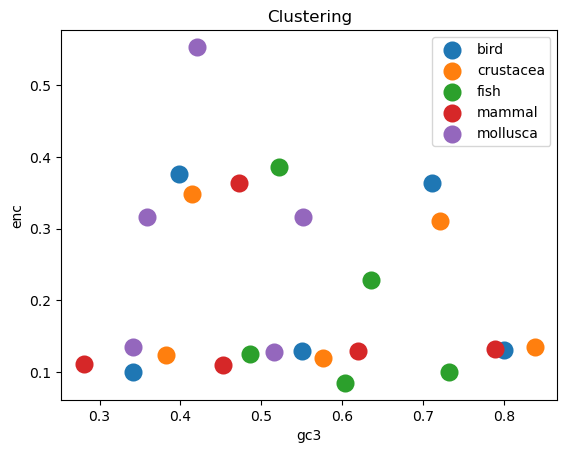

In [63]:
plot_clusters(kmeans_centroid,kmeans_label,scaled_values,['gc3', 'enc'])

In [64]:
gmm_label,scaledValues,Gaussian_centroid, sillhouettescore=applyGaussianMixtureScore('gc3', 'enc')


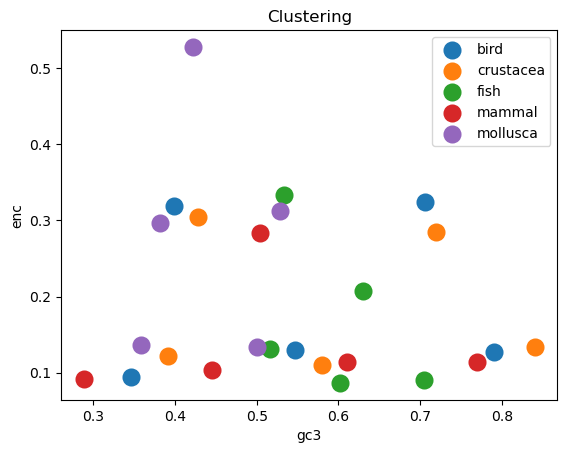

In [65]:
plot_clusters(Gaussian_centroid,gmm_label,scaledValues,['gc3', 'enc'])

In [67]:
kmeans_centroid,kmeans_label,scaled_values, sillhouettescore=applyKmeansScore('gc', 'enc')
print(sillhouettescore)

C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\

{'bird': 0.3333484936760932, 'crustacea': 0.2712415216141311, 'fish': 0.33239029137543813, 'mammal': 0.3650839852386045, 'mollusca': 0.282161257395115}


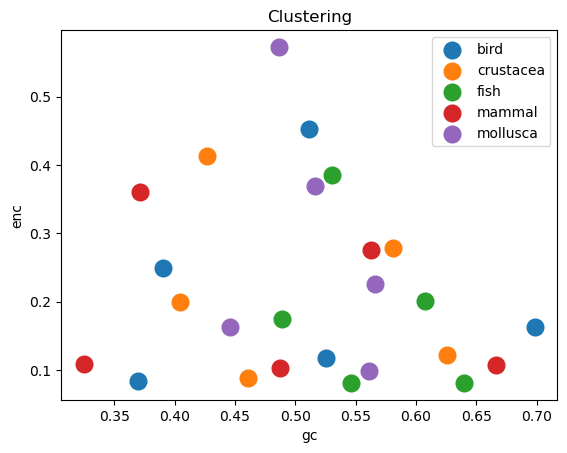

In [68]:
plot_clusters(kmeans_centroid,kmeans_label,scaled_values,['gc', 'enc'])

In [69]:
gmm_label,scaledValues,Gaussian_centroid, sillhouettescore=applyGaussianMixtureScore('gc', 'enc')

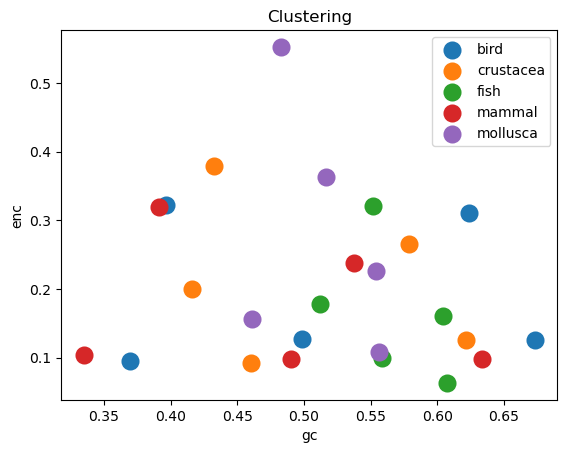

In [70]:
plot_clusters(Gaussian_centroid,gmm_label,scaledValues,['gc', 'enc'])

In [71]:
kmeans_centroid,kmeans_label,scaled_values, sillhouettescore=applyKmeansScore('gc', 'gc3')
print(sillhouettescore)

C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\

{'bird': 0.416976304849112, 'crustacea': 0.43964720643927757, 'fish': 0.35963539862743854, 'mammal': 0.38499646423562683, 'mollusca': 0.35837638709772013}


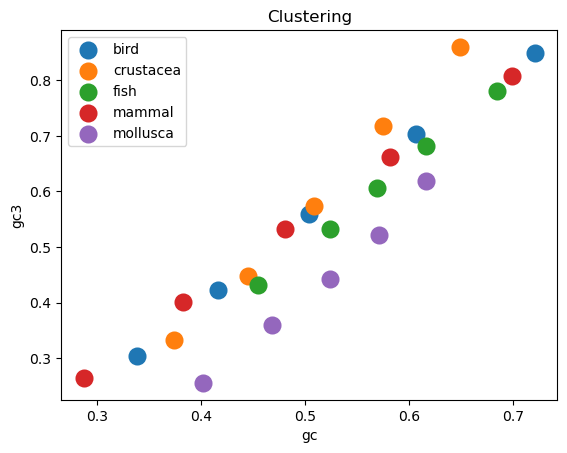

In [72]:
plot_clusters(kmeans_centroid,kmeans_label,scaled_values,['gc', 'gc3'])

In [73]:
gmm_label,scaledValues,Gaussian_centroid, sillhouettescore=applyGaussianMixtureScore('gc', 'gc3')

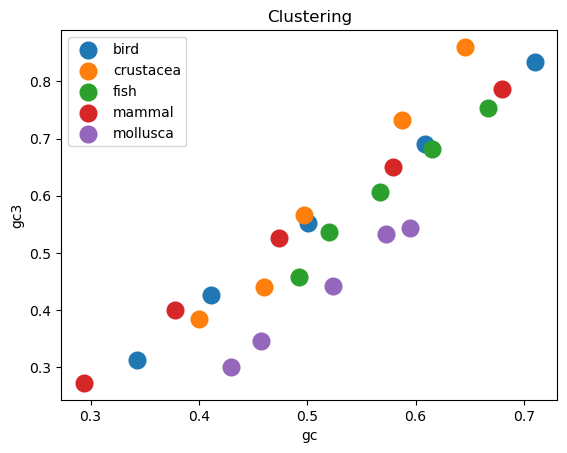

In [74]:
plot_clusters(Gaussian_centroid,gmm_label,scaledValues,['gc', 'gc3'])

In [75]:
kmeans_centroid,kmeans_label,scaled_values, sillhouettescore=applyKmeansScoreGcGc2('gc', 'gc3')
print(sillhouettescore)

C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devesh\anaconda3\Lib\site-packages\sklearn\

{'bird': 0.412710380968572, 'crustacea': 0.43512958759352655, 'fish': 0.08746661140364118, 'mammal': 0.37197004660037813, 'mollusca': 0.356783617317447}


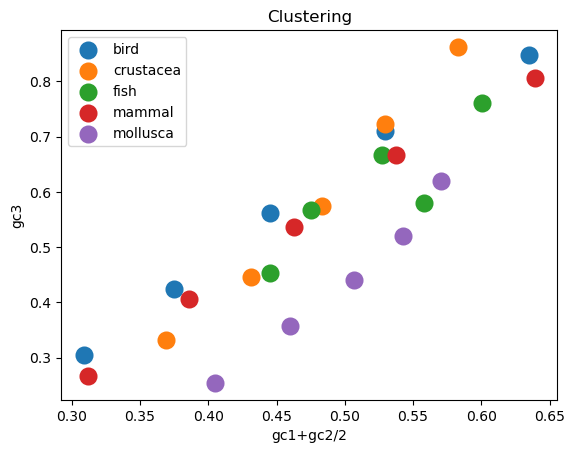

In [76]:
plot_clusters(kmeans_centroid,kmeans_label,scaled_values,['gc1+gc2/2', 'gc3'])

In [81]:
gmm_label,scaledValues,Gaussian_centroid,sillhouettescore=applyGaussianMixtureTestScore('gc', 'gc3')
print(sillhouettescore)

{'bird': 0.3912097700073723, 'crustacea': -0.07259534616660462, 'fish': 0.1220356476682629, 'mammal': 0.37618839982895125, 'mollusca': 0.07576739075386127}


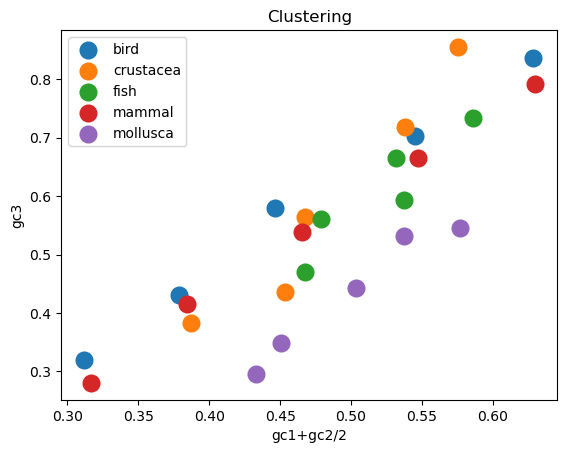

In [79]:
plot_clusters(Gaussian_centroid,gmm_label,scaledValues,['gc1+gc2/2', 'gc3'])

In [18]:
from sklearn.mixture import GaussianMixture
def applyGaussianMixture(*features):
    gmm_label={}
    gmm_centroid={}
    scaledValues=featurescalingTrain(*features)
    pcadict=apply_pca(scaledValues)
    gmm = GaussianMixture(n_components=5, random_state=42)
    for key in scaledValues:
        gmm_label[key]= gmm.fit(scaledValues[key])
        gmm_centroid[key]=gmm.means_
    return gmm_label,scaledValues,gmm_centroid


In [19]:
from sklearn.mixture import GaussianMixture
def applyGaussianMixtureScore(*features):
    gmm_label={}
    gmm_centroid={}
    predict={}
    sillhouettescoredict={}

    scaledValues=featurescalingTrain(*features)
    scaledValues_test=featurescalingtest(*features)

    pcadict=apply_pca(scaledValues)
    gmm = GaussianMixture(n_components=5, random_state=42)
    for key in scaledValues:
        gmm_label[key]= gmm.fit(scaledValues[key])
        gmm_centroid[key]=gmm.means_
        predict[key]=gmm.predict(scaledValues_test[key])
        sillhouettescoredict[key]=silhouette_score(scaledValues_test[key],predict[key])
    return gmm_label,scaledValues,gmm_centroid,sillhouettescoredict


In [80]:
from sklearn.mixture import GaussianMixture
def applyGaussianMixtureTestScore(*features):
    gmm_label={}
    gmm_centroid={}
    predict={}
    sillhouettescoredict={}

    scaledValues=featurescalingTrain(*features)
    scaledValues_test=featurescalingTestGcGc2(*features)

    pcadict=apply_pca(scaledValues)
    gmm = GaussianMixture(n_components=5, random_state=42)
    for key in scaledValues:
        gmm_label[key]= gmm.fit(scaledValues[key])
        gmm_centroid[key]=gmm.means_
        predict[key]=gmm.predict(scaledValues_test[key])
        sillhouettescoredict[key]=silhouette_score(scaledValues_test[key],predict[key])
    return gmm_label,scaledValues,gmm_centroid,sillhouettescoredict


In [21]:
from sklearn.mixture import GaussianMixture
def applyGaussianMixtureGcGc2(*features):
    gmm_label={}
    gmm_centroid={}
    scaledValues=featurescalingTrainGcGc2(*features)
    pcadict=apply_pca(scaledValues)
    gmm = GaussianMixture(n_components=5, random_state=42)
    for key in scaledValues:
        gmm_label[key]= gmm.fit_predict(scaledValues[key])
        gmm_centroid[key]=gmm.means_
    return gmm_label,scaledValues,gmm_centroid


In [22]:
from sklearn.mixture import GaussianMixture
def applyGaussianPCAMixture(*features):
    gmm_label={}
    gmm_centroid={}
    scaledValues=featurescalingTrain(*features)
    pcadict=apply_pca(scaledValues)
    gmm = GaussianMixture(n_components=3, random_state=42)
    for key in pcadict:
        gmm_label[key]= gmm.fit_predict(pcadict[key])
        gmm_centroid[key]=gmm.means_
    return gmm_label,scaledValues,gmm_centroid


In [23]:
def apply_umap(scaledValues):
  l=list(scaledValues.keys())
  umaodict={}
  umap_model = umap.UMAP(n_neighbors=2, min_dist=0.1, random_state=42)
  for key in l:
    umaodict[key]=umap_model.fit_transform(scaledValues[key])


  return umaodict





|cds ID|cds length|GC%|ENc|GC1|GC2|GC3|
|---|---|---|---|---|---|---|
|XM_018157745.1|	3366|	53.17884729649436|	55.82253358402565|	56.14973262032086|	53.03030303030303|	50.356506238859176|
|XM_018164080.1|	477|	42.9769392|	49.11049404071809|	50.943396226415096|	39.62264150943396|	38.36477987421384|
|XM_018159337.1|	2376|	52.31481481481482|	55.79995614|	54.292929292929294|	46.33838383838384|	56.313131313131315|



**Hint - What is**

- **cds ID** - e.g. XM_018157745.1 - first id in fasta file after >
- **cds length** - length of sequences
- **GC%** - see from Bio.SeqUtils import **gc_fraction**
- **ENc** - see import codonbias as cb, enc.get_score(str(record.seq))
- **GC1,2,3** - 1st, 2nd and 3rd part of codon


**Clustering**

Because each file has 20 000 - 50 000 rows, use clustering to gather parts together, however, always keep together groups of organisms and in graphs, distinguish colors.

Aves

Crustacea

Mammalia

Molusca

Osteychthyes

For logic of clustering use several differen methods
e.g. PCA, k-means, tsne, try vectorizing

Tool e.g. umap -  https://pair-code.github.io/understanding-umap/

**Make 3d graphs**

see examples

![2D graph](https://github.com/MartaVohnoutovaBukovec/IOS-655-Python-a-Bash/blob/master/clusterENcGC3.png?raw=true "2D graph")

![3D graph](https://github.com/MartaVohnoutovaBukovec/IOS-655-Python-a-Bash/blob/master/clusterGC1GC2GC3.png?raw=true "3D graph")

You can use either 3D and/or 2D graphs and try combine columns

|GC%|	ENc|	GC1|	GC2|	GC3|
|---|---|---|---|---|

Play with data and try to find out relations.

In the end, make some conclusion, summarize it.